**Hierarchical_Attention_Netwok_bangla_text_BTSC Score**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install bnltk

In [ ]:
pip install bnlp_toolkit

     |████████████████████████████████| 1.2MB 3.9MB/s 
     |████████████████████████████████| 23.9MB 146kB/s 
     |████████████████████████████████| 747kB 30.1MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from bnlp import BasicTokenizer

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
pip install chart_studio

     |████████████████████████████████| 71kB 2.2MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import bnltk
from bnltk.stemmer import BanglaStemmer
from bnltk.tokenize import Tokenizers
t = Tokenizers()

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim
import os
import re

sns.set_style("whitegrid")
np.random.seed(0)
from chart_studio import plotly
import plotly.graph_objs as go
import plotly

from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers


from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Reshape
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 
import tensorflow as tf
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten, Attention
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import Adam
from keras.layers.wrappers import TimeDistributed
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.optimizers import SGD
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers import LSTM
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras import backend as K
from pickle import load
from keras.utils import to_categorical
from tensorflow.python.keras.metrics import Metric
from tensorflow.keras import layers
from tensorflow.keras import losses
import numpy as np
from numpy import array
from keras.layers import concatenate
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Input
import sklearn.metrics as metrics

In [ ]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
excel_data_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/Cricket_Updated.xlsx', sheet_name='Sheet1', usecols=['Text', 'BTSC_Positive', 'BTSC_Negative', 'BTSC_Neutral'], dtype={'Text': str})
excel_data_df.head(10)

,Text,BTSC_Positive,BTSC_Negative,BTSC_Neutral
0,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,1,0,0
1,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,1,0,0
2,বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?।,1,0,0
3,সৌম্যকে বাদ দেওয়া হোক।,0,1,0
4,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",1,0,0
5,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",1,0,0
6,মুসফিক আর তামিমের বেটিং তান্ড়বে কুহিলির জিব্ব...,0,1,0
7,সত্যি সত্যিই ছিলো বাঘ আমাদেরই চাপে হয়ে গেলো ব...,0,1,0
8,বাংলাদেশ জিতবে ইনশা আল্লাহ।,1,0,0
9,"ক্রিকেটে ভারত একটা অসভ্য দল,বিরাট কোহলির আচরনে...",0,1,0


In [ ]:
dataset = excel_data_df["Text"].values
y  = excel_data_df[["BTSC_Positive", "BTSC_Negative", "BTSC_Neutral"]].values

In [ ]:
dataset[:5]

array(['জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।',
       'জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।',
       'বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?।',
       '\xa0সৌম্যকে বাদ দেওয়া হোক।',
       'প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবরে দলে রাখা।'],
      dtype=object)

In [ ]:
dataset.size

2979

In [ ]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
y.shape

(2979, 3)

In [ ]:
y[0]

array([1, 0, 0])

In [ ]:
2979*3

8937

In [ ]:
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

In [ ]:
reviews = []
labels = []
texts = []

In [ ]:
## Count of maximum sentence in a document
count_of_max_sentence = 0
max_counts = 0

## Count of maximum length of word in a sentence in document

count_of_max_words = 0
max_counts_len_of_sentence = 0

In [ ]:
corpus = excel_data_df['Text'].tolist()

In [ ]:
corpus[2458]

'আমাদের চিত্রনায়ক রুবেল ক্রিকেট নিয়ে কিছু কথা বলে ছিলেন কয়এক দিন আগে সেটা শুনে আমাদের কিছু কিছু লোকের মটেও ভাল লাগেনি কিন্তু ভেবে দেখেন ভালই বলে ছেন ওটা ই করা উচিত তাহলে সবাই ভাল খেলবে টাকার পুড়া বলে কথা।'

In [ ]:
with open ("/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/stopWordModel.txt", encoding='utf8') as myfile:
  listOfStopWord = myfile.read().splitlines()
with open ("/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/Pretrained Word2Vector/Dataset/special letters.txt", encoding='utf8') as myfile:
  SpecialLetters_text = myfile.read().splitlines()

## ADD two list 
SpecialLetters = []
SpecialLetters.extend(SpecialLetters_text)
SpecialLetters.extend(listOfStopWord)

In [ ]:
SpecialLetters[:10]

['\ufeff>>>', '!', '।', '@', '#', '$', '%', '^', '&', '*']

In [ ]:
#Tokenize Every Sentece in a Document

for idx in range(dataset.size):
  texts.append(dataset[idx])
  sentence_tokens = bnltk.sentence_tokenize(dataset[idx])
  max_counts = len(sentence_tokens)
  reviews.append(sentence_tokens)
  if max_counts > count_of_max_sentence:
    count_of_max_sentence = max_counts
    print(idx)
  max_counts = 0

0
221


In [ ]:
texts[:5]

['জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।',
 'জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।',
 'বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?।',
 '\xa0সৌম্যকে বাদ দেওয়া হোক।',
 'প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবরে দলে রাখা।']

In [ ]:
count_of_max_sentence

4

In [ ]:
Tex_Fitting_Sequence = []

In [ ]:
basic_tokenizer = BasicTokenizer()
Sequence_list = []
sentecnceList = []
listOfTotalSentence_list = []
resultToken = ""
sentence = ""

for i in range(0, len(texts)):
  extractToken = basic_tokenizer.tokenize(corpus[i])
  resultToken = [k for k in extractToken if k not in SpecialLetters]
  #print(extractToken)
  listOfTotalSentence_list.append(extractToken)
  for token in resultToken:
      sentence = sentence + " " + token
  Sequence_list.append(sentence)
  sentence = ""

In [ ]:
Sequence_list[:5]

[' জয় বাংলা কাপ স্বাধীনতার মাস মার্চে মাথা চমৎকার আইডিয়া এসেছে তালে স্যালুট',
 ' জয় বাংলা কাপ স্বাধীনতার মাস মার্চে মাথা চমৎকার আইডিয়া এসেছে তালে স্যালুট',
 ' বাংলাদেশের ভারতের সাপর্ট',
 ' সৌম্যকে বাদ দেওয়া',
 ' প্রথমটি কোচ অত সাকিব সাকিব সাকিবরে দলে রাখা']

In [ ]:
reviews[:4]

[['জয় বাংলা কাপ!',
  'তাও আবার স্বাধীনতার মাস মার্চে।',
  'যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।'],
 ['জয় বাংলা কাপ!',
  'তাও আবার স্বাধীনতার মাস মার্চে।',
  'যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।'],
 ['বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?।'],
 ['\xa0সৌম্যকে বাদ দেওয়া হোক।']]

In [ ]:
reviews[0][2]

'যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।'

In [ ]:
texts[:10]

['জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।',
 'জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।',
 'বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?।',
 '\xa0সৌম্যকে বাদ দেওয়া হোক।',
 'প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবরে দলে রাখা।',
 'প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবরে দলে রাখা।',
 ' মুসফিক আর তামিমের বেটিং তান্ড়বে কুহিলির জিব্বহাটা শুকিয়ে গেছেরে গরুর মুত খাওয়ার জন্য।',
 '\xa0সত্যি সত্যিই ছিলো বাঘ আমাদেরই চাপে হয়ে গেলো বেড়াল।',
 'বাংলাদেশ জিতবে ইনশা আল্লাহ।',
 'ক্রিকেটে ভারত একটা অসভ্য দল,বিরাট কোহলির আচরনে স্পষ্ট ফুটে উঠে।']

In [ ]:
len(texts[0])

97

In [ ]:
reviews[0]

['জয় বাংলা কাপ!',
 'তাও আবার স্বাধীনতার মাস মার্চে।',
 'যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।']

In [ ]:
len(reviews[0])

3

In [ ]:
type(reviews[0])

list

In [ ]:
type(reviews[0][0])

str

In [ ]:
##################################################################################################################
####### Counting maximum length of sentence &&& remove Special Letters from Text #################

basic_tokenizer = BasicTokenizer()
listOfTotalSentence_list = []
sentecnceList = []
resultToken = ""
sentence = ""
for i in range(0, len(reviews)):
  for j in range(0, len(reviews[i])):
    extractToken = basic_tokenizer.tokenize(reviews[i][j])
    resultToken = [k for k in extractToken if k not in SpecialLetters]
    #### Counting maximum length of sentence ####
    max_counts = len(resultToken)
    if max_counts > count_of_max_words:
      count_of_max_words = max_counts
      print(i)
    max_counts = 0
    for token in resultToken:
      sentence = sentence + " " + token
    sentecnceList.append(sentence)
    sentence = ""
    #print(sentecnceList)
  listOfTotalSentence_list.append(sentecnceList)
  sentecnceList = []

In [ ]:
count_of_max_words

23

In [ ]:
count_of_max_sentence

4

In [ ]:
maxlen = count_of_max_words + 1          #[count of maximum word in a sentence in document, SET]
max_sentences = count_of_max_sentence - 1  #[maximum sentence in document, SET]
#max_words = 200000
embedding_dim = 128
validation_split = 0.1

In [ ]:
listOfTotalSentence_list[2458]

[' চিত্রনায়ক রুবেল ক্রিকেট কথা কয়এক শুনে লোকের মটেও লাগেনি ভেবে দেখেন ভালই ছেন ওটা খেলবে টাকার পুড়া কথা']

In [ ]:
listOfTotalSentence_list[221]

[' পরাজয় হয়ছি',
 ' করার কিছু নাই',
 ' কিন্তু মাএ ৮২ রানে অলআউট মানতে পারলাম না',
 '']

In [ ]:
len(listOfTotalSentence_list)

2979

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Sequence_list)

data = np.zeros((len(listOfTotalSentence_list), max_sentences, maxlen), dtype='int32')

In [ ]:
data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int32)

In [ ]:
word_index = tokenizer.word_index
print('Found %s uniquue tokens.' % len(word_index))

Found 6554 uniquue tokens.


In [ ]:
for word, i in word_index.items():
  print(word)

In [ ]:
max_words = len(word_index) + 1

In [ ]:
########################################################################################

########### Main Preprocessing part in 3D numpy array (****** Data ***) ###############


for i, sentences in enumerate(listOfTotalSentence_list):
    #print(i)
    #print(sentences)
    for j, sent in enumerate(sentences):
        #print(j)
        #print(sent)
        if j < max_sentences:
            wordTokens = text_to_word_sequence(sent)
            #print(wordTokens)
            k = 0
            for _, word in enumerate(wordTokens):
                #print(word+" "+str(tokenizer.word_index[word]))
                if k < maxlen and tokenizer.word_index[word] < max_words:
                    print(word+" "+str(tokenizer.word_index[word]))
                    data[i, j, k] = tokenizer.word_index[word]
                    k = k + 1

In [ ]:
data[2458]

array([[5743,  553,    3,   14, 5744, 2474, 2076, 5745, 5746,  663,  501,
         500, 5747, 2264,  135,  331, 5748,   14,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]], dtype=int32)

In [ ]:
data[221]

array([[ 459, 1613,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 843,  280,   49,   96,  844,  678,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]], dtype=int32)

In [ ]:
data

array([[[  98,  441,  785, ...,    0,    0,    0],
        [1491,  228, 1492, ...,    0,    0,    0],
        [ 185, 1037, 1493, ...,    0,    0,    0]],

       [[  98,  441,  785, ...,    0,    0,    0],
        [1491,  228, 1492, ...,    0,    0,    0],
        [ 185, 1037, 1493, ...,    0,    0,    0]],

       [[   2,   99, 2588, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       ...,

       [[ 262, 1419,   51, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[2577, 2578, 2579, ...,    0,    0,    0],
        [ 766, 1036, 1454, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[  25, 2560, 2562, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]]], dtype=int32)

In [ ]:
print('Shape of reviews (data) tensor:', data.shape)
print('Shape of sentiment (label) tensor:', y.shape)

Shape of reviews (data) tensor: (2979, 3, 24)
Shape of sentiment (label) tensor: (2979, 3)


In [ ]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
data.size

214488

In [ ]:
data.shape[0]

2979

In [ ]:
y.size

8937

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.1, random_state=42)

In [ ]:
x_train.size

193032

In [ ]:
x_train

array([[[3242, 1799,    4, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[  46,  300,  671, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[   3,    6,  333, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       ...,

       [[3630,    0,    0, ...,    0,    0,    0],
        [3631, 3632, 3633, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[3942,  255,  408, ...,    0,    0,    0],
        [ 873,   42, 1503, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[ 215,  660, 1070, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]]], dtype=int32)

In [ ]:
y_train

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
y_train.size

8043

In [ ]:
x_test

array([[[  50,  346,  509, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[1432, 5369,    9, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[   6,  160,    0, ...,    0,    0,    0],
        [ 693,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       ...,

       [[  13, 4548, 4549, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[5961,  184, 5962, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[ 250, 4349,   33, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]]], dtype=int32)

In [ ]:
x_test.size

21456

In [ ]:
y_test.size

894

In [ ]:
_x_train, _x_val, _y_train, _y_val = train_test_split(x_train, y_train, train_size =0.9, random_state=233)

In [ ]:
_x_train[221]

array([[   1,  474,   14,  123, 1637, 2825,  475,  282,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]], dtype=int32)

In [ ]:
print(_x_train.size)

173664


In [ ]:
print(_x_val.size)

19368


In [ ]:
_x_val

array([[[  60,  616,  261, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[2479, 5790,  788, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[1231, 5079,  638, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       ...,

       [[ 512,   66,  253, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[  67,  118, 5887, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[   9,  157,   60, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]]], dtype=int32)

In [ ]:
_y_val

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1,

In [ ]:
print('Number of positive and negative, neutral reviews in training and validation set')
print(_y_train.sum(axis=0))
print(_y_val.sum(axis=0))

Number of positive and negative, neutral reviews in training and validation set
[ 501 1705  206]
[ 63 183  23]


In [ ]:
class AttentionLayerWithContext(Layer):
    
    def __init__(self,attention_dim=128,return_coefficients=False,**kwargs):
        # Initializer 
        self.supports_masking = True
        self.return_coefficients = return_coefficients
        self.init = initializers.get('glorot_uniform') # initializes values with uniform distribution
        self.attention_dim = attention_dim
        super(AttentionLayerWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        # Builds all weights
        # W = Weight matrix, b = bias vector, u = context vector
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)),name='W')
        self.b = K.variable(self.init((self.attention_dim, )),name='b')
        self.u = K.variable(self.init((self.attention_dim, 1)),name='u')
        self._trainable_weights = [self.W, self.b, self.u]

        super(AttentionLayerWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, hit, mask=None):
        # Here, the actual calculation is done
        uit = K.bias_add(K.dot(hit, self.W),self.b)
        uit = K.tanh(uit)
        
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)
        ait = K.exp(ait)
        
        if mask is not None:
            ait *= K.cast(mask, K.floatx())

        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = hit * ait
        
        if self.return_coefficients:
            return [K.sum(weighted_input, axis=1), ait]
        else:
            return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        if self.return_coefficients:
            return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[-1], 1)]
        else:
            return input_shape[0], input_shape[-1]

**Load Word Emmbedding Model From Colab Repository**

In [ ]:
word2Vec_embeddings_index = {}
word2vec_file = open(os.path.join('', '/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/embedding_word2vec.txt'), encoding = "utf-8")

for line in word2vec_file:
    values = line.split()
    word = values[0]
    coefficient = np.asarray(values[1:])
    word2Vec_embeddings_index[word] = coefficient
word2vec_file.close()

In [ ]:
word2Vec_embeddings_index['ব্যাটিং']

array(['-0.29034933', '-0.28357667', '-1.4898546', '-1.3868158',
       '-0.36695972', '0.7460533', '3.338886', '-0.5379964', '-1.020897',
       '-2.2361712', '0.1125168', '3.047968', '3.3939734', '1.6231028',
       '-0.19987528', '-0.10868621', '-1.0979058', '-1.8782905',
       '0.38264722', '-3.354523', '1.752252', '-1.8267401', '-0.2932593',
       '2.2992973', '3.0524168', '5.089094', '0.73869467', '1.2971137',
       '0.17097823', '1.7176449', '-2.5292568', '1.1126709', '1.054172',
       '1.6076148', '-1.1783893', '3.598212', '-2.5543368', '2.2083519',
       '-0.26716262', '-2.431978', '0.80158645', '2.5584784', '1.5352808',
       '-1.658103', '0.6142389', '-0.20899667', '2.0823743', '4.7707477',
       '-1.3924304', '-0.8462774', '-1.22416', '-0.97621083',
       '-2.7975519', '0.9568934', '-1.3884915', '-0.74545455',
       '-1.3156334', '1.2744031', '0.9124677', '3.372807', '0.91754013',
       '-1.0596912', '1.1758869', '-1.9719416', '-0.7809845',
       '-0.8262792', '-

In [ ]:
##embedding_matrix
word2Vec_embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

In [ ]:
max_words

6555

In [ ]:
for word, i  in word_index.items():
    if i > len(word_index) + 1:
        continue
    word2Vec_embedding_vector = word2Vec_embeddings_index.get(word)
    if word2Vec_embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        word2Vec_embedding_matrix[i] = word2Vec_embedding_vector

In [ ]:
word2Vec_embedding_matrix.shape

(6555, 128)

In [ ]:
print(word2Vec_embedding_matrix.shape[0])
print(word2Vec_embedding_matrix.shape[1])

print(word2Vec_embedding_matrix)

6555
128
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 2.7092476e+00 -2.8616824e+00  7.0153770e-01 ...  5.0501100e-01
   1.1104745e+00  3.3496140e+00]
 [ 3.5014632e+00 -1.9833351e+00  2.6378360e+00 ...  8.3541460e-01
   1.5703882e+00  1.2508607e+00]
 ...
 [ 5.2884245e-01 -4.1359270e-01 -1.2077864e+00 ... -8.9521120e-01
  -3.5376110e-01 -1.0574421e-01]
 [-9.7057370e-03 -1.6094232e-02 -1.8642237e-02 ... -4.2468918e-04
  -8.7086790e-03 -3.1619158e-02]
 [-3.0831678e-02 -1.3072783e-02 -3.6504935e-02 ... -2.5322761e-02
  -3.0173631e-02 -8.2293120e-02]]


In [ ]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy

def precision(y_true, y_pred):
    #print(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    return 2*((precision_val*recall_val)/(precision_val+recall_val+K.epsilon()))

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

**# building Hierachical Attention network**

In [ ]:
embedding_layer = Embedding(len(word_index) + 1, embedding_dim, weights=[word2Vec_embedding_matrix],
                            input_length=maxlen, trainable=True, mask_zero=True)

In [ ]:
sentence_input = Input(shape=(maxlen,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
lstm_word = Bidirectional(LSTM(128, return_sequences=True))(embedded_sequences)
model1d = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.1, stddev=0.05, seed=None))(lstm_word)
word_dense = TimeDistributed(Dense(100))(model1d)
attn_word = AttentionLayerWithContext(100)(lstm_word)
sentenceEncoder = Model(sentence_input, attn_word)

review_input = Input(shape=(max_sentences, maxlen), dtype='int32')
review_encoder = TimeDistributed(sentenceEncoder)(review_input)
lstm_sentence = Bidirectional(LSTM(128, return_sequences=True))(review_encoder)
model1d = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.1, stddev=0.05, seed=None))(lstm_sentence)
attn_sentence = AttentionLayerWithContext(100)(model1d)
preds = Dense(3, activation='sigmoid')(attn_sentence)
HAN_LSTM_model = Model(review_input, preds)

In [ ]:
opt = Adam(lr=0.00001)

HAN_LSTM_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', precision, recall, f1_score, tf.keras.metrics.AUC(), mean_pred,])

In [ ]:
print("model fitting - Hierarchical attention network with LSTM")
Han_model_LSTM_fit = HAN_LSTM_model.fit(_x_train, _y_train, validation_data=(_x_val, _y_val), epochs=50, batch_size=256)

In [ ]:
print(HAN_LSTM_model.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 3, 24)]           0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, 3, 256)            1128008   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 3, 256)            394240    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1, 64)             49216     
_________________________________________________________________
attention_layer_with_context (None, 64)                6600      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 1,578,259
Trainable params: 1,578,259
Non-trainable params: 0
_________________________________________________

In [ ]:
#Evaluate the CNN+Word2Vec Model accuracy of our trained model
HAN_LSTM_train_score = HAN_LSTM_model.evaluate(_x_train, _y_train, batch_size=100, verbose=1)
print('Train Loss:', HAN_LSTM_train_score[0])
print('Train Accuracy:', HAN_LSTM_train_score[1])

25/25 [==============================] - 4s 140ms/step - loss: 0.0023 - accuracy: 0.9884 - precision: 0.9908 - recall: 0.9872 - f1_score: 0.9890 - auc_10: 0.9993 - mean_pred: 0.3367
Train Loss: 0.0022697830572724342
Train Accuracy: 0.9883913993835449


In [ ]:
#Evaluate the CNN+Word2Vec accuracy base our test samples
HAN_LSTM_test_score = HAN_LSTM_model.evaluate(x_test, y_test, batch_size=256, verbose=2)
print('Test Loss:', HAN_LSTM_test_score[0])
print('Test Accuracy:', HAN_LSTM_test_score[1])

2/2 - 0s - loss: 0.0661 - accuracy: 0.7852 - precision: 0.7343 - recall: 0.8012 - f1_score: 0.7659 - auc_10: 0.8775 - mean_pred: 0.3739
Test Loss: 0.06612427532672882
Test Accuracy: 0.7852349281311035


In [ ]:
#Predicting......
print('Predicting....')
y_pred = HAN_LSTM_model.predict(x_test,batch_size=100,verbose=1)

Predicting....
3/3 [==============================] - 6s 144ms/step


In [ ]:
predict_results = y_pred.argmax(axis=1)

In [ ]:
predict_results.shape

(596,)

In [ ]:
y_test_results = y_test.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_results.tolist(),predict_results.tolist()))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62        56
           1       0.84      0.89      0.87       220
           2       0.33      0.18      0.24        22

    accuracy                           0.79       298
   macro avg       0.61      0.56      0.57       298
weighted avg       0.77      0.79      0.77       298



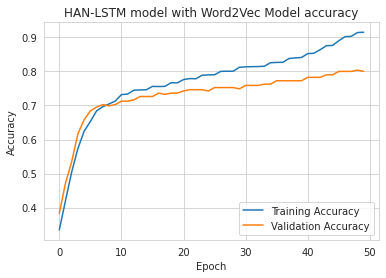

In [ ]:
# Plot training & validation accuracy values
plt.plot(Han_model_LSTM_fit.history['accuracy'])
plt.plot(Han_model_LSTM_fit.history['val_accuracy'])
plt.title('HAN-LSTM model with Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

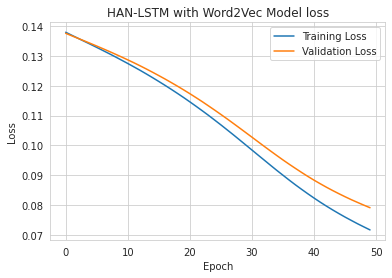

In [ ]:

# Plot training & validation loss values
plt.plot(Han_model_LSTM_fit.history['loss'])
plt.plot(Han_model_LSTM_fit.history['val_loss'])
plt.title('HAN-LSTM with Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()